# Visualization
This notebook is used for the visualization and summarization of the data.

In [1]:
import sys
sys.path.append('../utils/')
from visualization import *


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore")


In [2]:
DATA_PATH = '../../data/intermediate/'
IMAGE_PATH = '../../images/visualization/'
PATH_FINAL = '../../data/final/'

## 1. Students

In [3]:
students = pd.read_csv(DATA_PATH+'students.csv', index_col=0)
students.head(3)

,age_end,age_now,age_start,birth_date,citizenship,date_end,date_start,degree,gender,graduated,...,major,major_number,permanent_address,relevance_date,study_length,university,year_of_study,years_for_degree,years_extra,dropout
0,29.0,40.0,23.0,1982.0,NaN,2011.0,2005,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
1,25.0,32.0,19.0,1990.0,NaN,2015.0,2009,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False
2,25.0,35.0,19.0,1987.0,NaN,2012.0,2006,MUDr.,NaN,True,...,Všeobecné lékařství,NaN,NaN,2021-12-17,6.0,HKUK,NaN,6.0,0.0,False


### 1.1 Graduated majors

,index,major
0,Všeobecné lékařství,10479
1,Zubní lékařství,1912
2,Vojenské všeobecné lékařství,96
3,Vojenské zubní lékařství,3


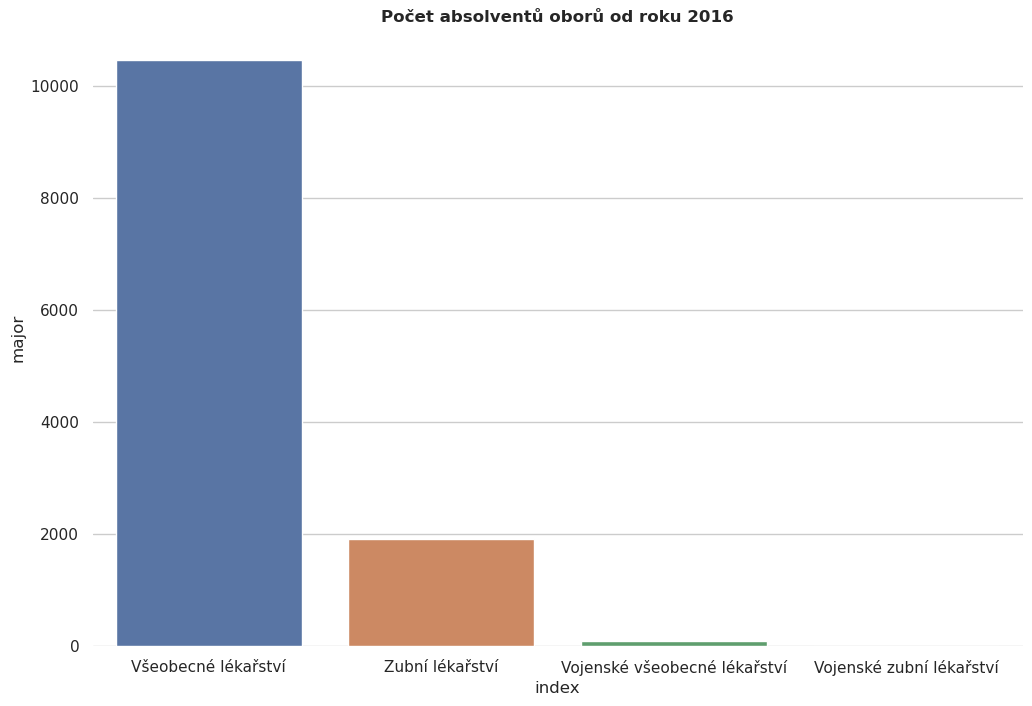

In [16]:
title = 'Počet absolventů oborů od roku 2016'

student_majors = students[(students.graduated == True) & (students.date_end >= 2016)]['major'].value_counts().reset_index()

display(student_majors)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

plt.title(title, fontweight="bold")
plt.ylabel('Počet')
plt.xlabel('Obor')

# sns.barplot(student_majors.index, student_majors.values);
sns.barplot(data=student_majors, x="index", y="major")

sns.despine(bottom = True, left = True)

save_plot(title)

In [21]:
students[(students.graduated == True) & (students.date_end >= 2016)].groupby(['date_end','major']).count()

age_end  age_now  age_start  \
date_end major                                                       
2016.0   Vojenské všeobecné lékařství       27       27         27   
         Všeobecné lékařství              1571     1571       1571   
         Zubní lékařství                   362      362        362   
2017.0   Vojenské všeobecné lékařství       18       18         18   
         Všeobecné lékařství              1738     1738       1738   
         Zubní lékařství                   361      361        361   
2018.0   Vojenské všeobecné lékařství       11       11         11   
         Všeobecné lékařství              1638     1638       1638   
         Zubní lékařství                   312      312        312   
2019.0   Vojenské všeobecné lékařství       11       11         11   
         Vojenské zubní lékařství            1        1          1   
         Všeobecné lékařství              1650     1650       1650   
         Zubní lékařství                   293      293        293   
2020.0   Vojenské všeobecné lékařství       22       22         22   
         Vojenské zubní lékařství            2        2          2   
         Všeobecné lékařství              1714     1714       1714   
         Zubní lékařství                   284      284        284   
2021.0   Vojenské všeobecné lékařství        7        7          7   
         Všeobecné lékařství              1710     1710       1710   
         Zubní lékařství                   297      297        297   
2022.0   Všeobecné lékařství                27       27         27   
         Zubní lékařství                     3        3          3   

                                       birth_date  citizenship  date_start  \
date_end major                                                               
2016.0   Vojenské všeobecné lékařství          27           27          27   
         Všeobecné lékařství                 1571          553        1634   
         Zubní lékařství                      362          162         362   
2017.0   Vojenské všeobecné lékařství          18           18          18   
         Všeobecné lékařství                 1738          669        1820   
         Zubní lékařství                      361          165         361   
2018.0   Vojenské všeobecné lékařství          11           11          11   
         Všeobecné lékařství                 1638          588        1710   
         Zubní lékařství                      312          154         312   
2019.0   Vojenské všeobecné lékařství          11           11          11   
         Vojenské zubní lékařství               1            1           1   
         Všeobecné lékařství                 1650          623        1719   
         Zubní lékařství                      293          163         293   
2020.0   Vojenské všeobecné lékařství          22           22          22   
         Vojenské zubní lékařství               2            2           2   
         Všeobecné lékařství                 1714          651        1783   
         Zubní lékařství                      284          146         284   
2021.0   Vojenské všeobecné lékařství           7            7           7   
         Všeobecné lékařství                 1710          625        1786   
         Zubní lékařství                      297          152         297   
2022.0   Všeobecné lékařství                   27           20          27   
         Zubní lékařství                        3            0           3   

                                       degree  gender  graduated  language  \
date_end major                                                               
2016.0   Vojenské všeobecné lékařství      27       0         27        27   
         Všeobecné lékařství             1634     169       1634      1634   
         Zubní lékařství                  362      84        362       362   
2017.0   Vojenské všeobecné lékařství      18       0         18        18   
         Všeobecn

### 1.2 Graduates

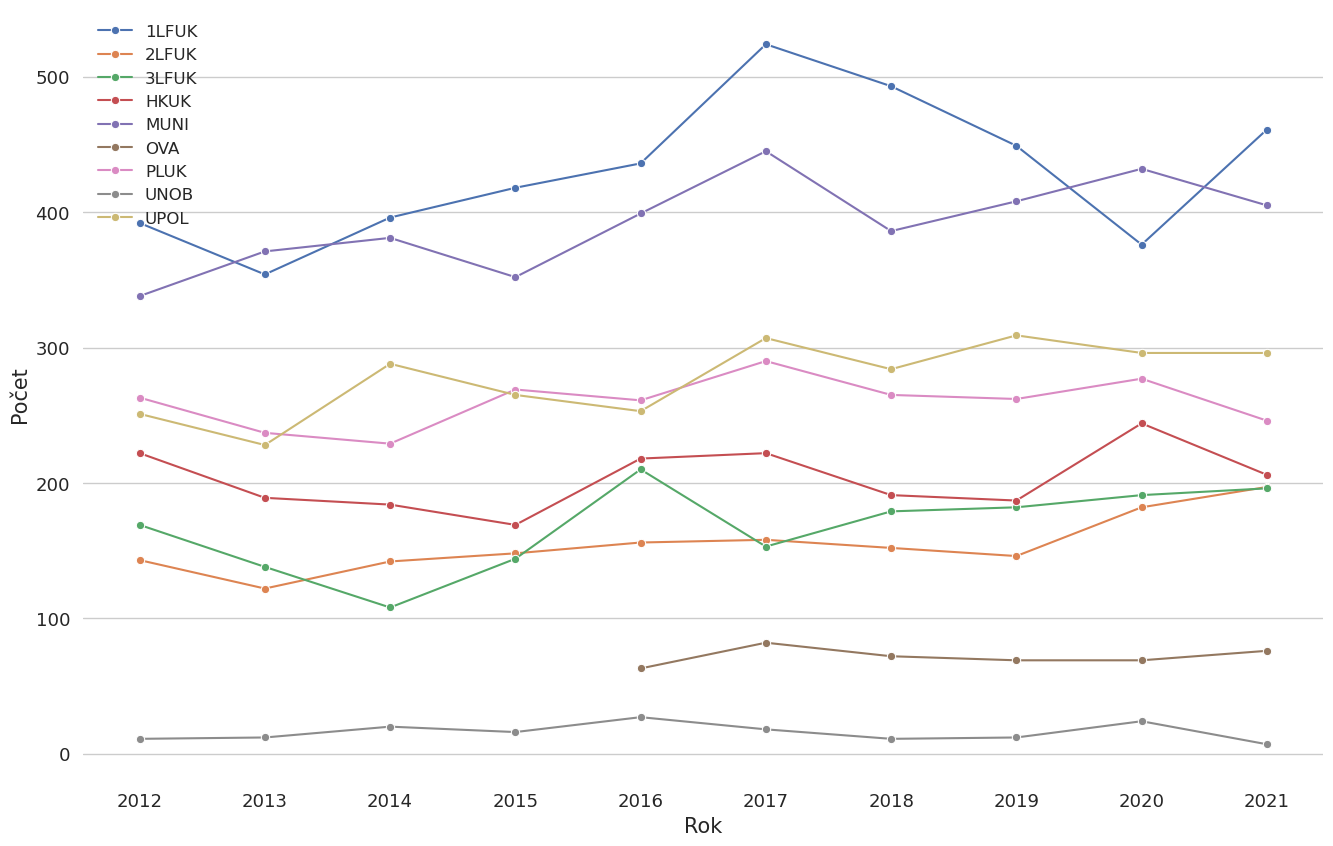

In [22]:
title = 'Absolventi fakult'

graduates = (students[(students.graduated == True) & (students.date_end < 2022) & (students.date_end > 2011)].groupby(['date_end', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

graduates = graduates.pivot(index=graduates['date_end'], columns='university')['degree']

graduates.columns = ['1LFUK', '2LFUK', '3LFUK', 'HKUK', 'MUNI', 'OVA', 'PLUK', 'UNOB', 'UPOL']

sns.set_style('whitegrid')

plt.grid(True, axis='y')
sns.set(rc={'figure.figsize':(16,10)})


for faculty in graduates.columns:
    ax = sns.lineplot(data=graduates, x='date_end', y=faculty, label=faculty, marker="o", linewidth = 1.5)
sns.despine(bottom = True, left = True)


ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.legend(frameon=False, fontsize=12)
plt.xlabel('Rok', fontsize=15)
plt.ylabel('Počet', fontsize=15);
plt.xticks(graduates.index, fontsize=13)
plt.yticks(fontsize=13)

save_plot(title)
plt.show();

### 1.3 Applicants

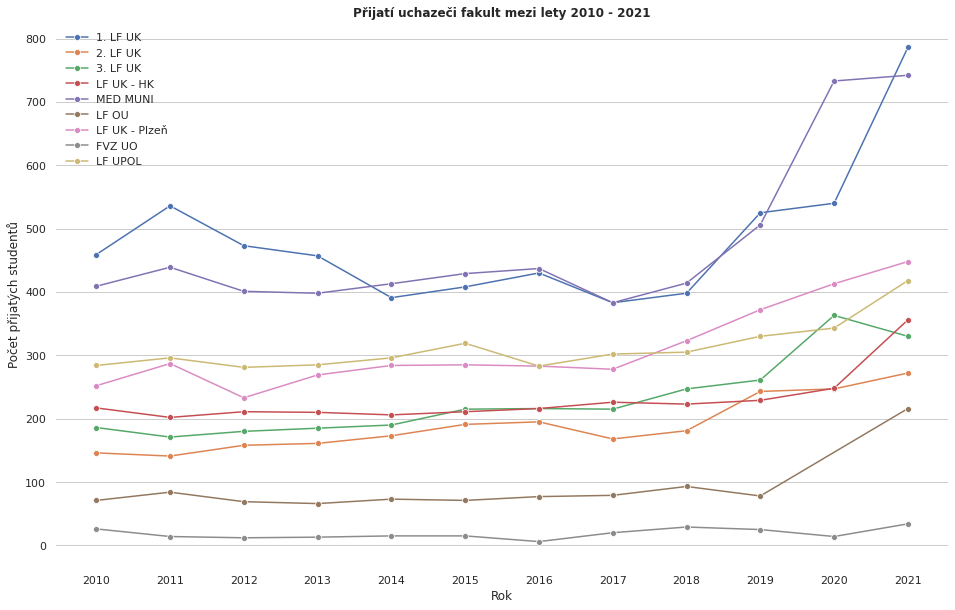

In [6]:

year_last = 2021
year_first = 2010
year_filter = ( year_first<= students.date_start)&(students.date_start <= year_last)
applicants = (students[year_filter].groupby(['date_start', 'university'])[['degree']]
                                                                                .count()
                                                                                .reset_index())

title = f'Přijatí uchazeči fakult mezi lety {year_first} - {year_last}'


sns.set_style("whitegrid")

applicants = applicants.pivot(index=applicants['date_start'], columns='university')['degree']

applicants.columns = ['1. LF UK', '2. LF UK', '3. LF UK', 'LF UK - HK', 'MED MUNI', 'LF OU', 'LF UK - Plzeň', 'FVZ UO', 'LF UPOL']


for faculty in applicants.columns:
    ax = sns.lineplot(applicants.index, applicants[faculty], label=faculty, marker="o")
    
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines
sns.despine(bottom = True, left = True)



plt.xticks(applicants.index)
plt.title(title, fontweight="bold")
plt.xlabel('Rok')
plt.ylabel('Počet přijatých studentů')
plt.legend(frameon=False)


save_plot(title)
plt.show();

### 1.4 Citizenship

,citizenship,degree
0,CZE,57.198325
1,SVK,26.821469
2,Ostatní,15.980206


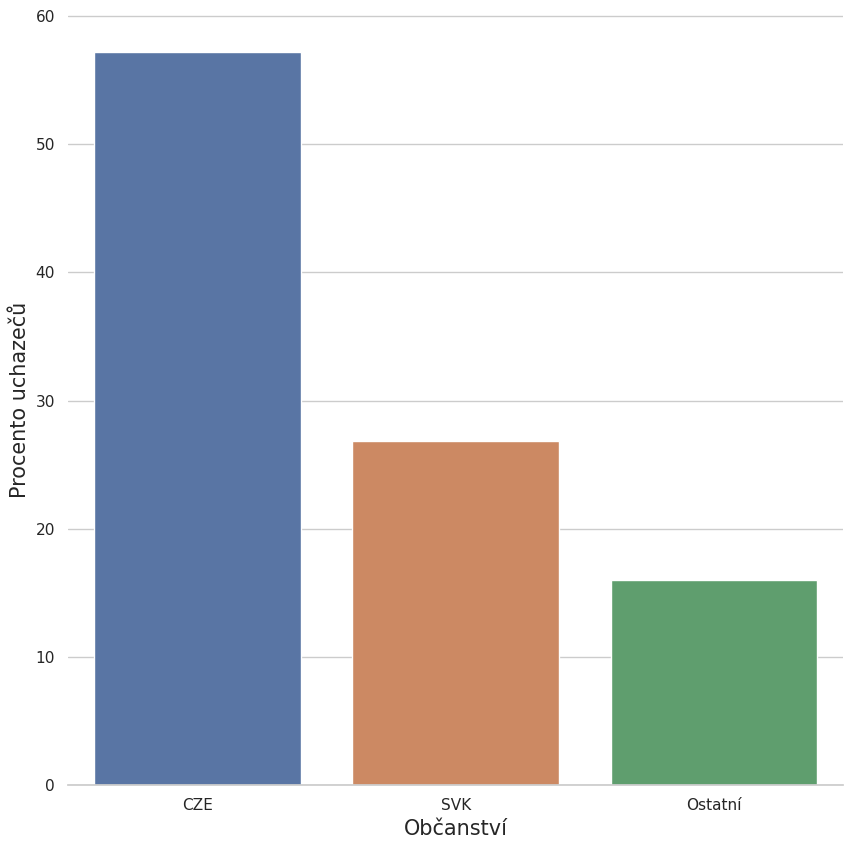

In [85]:
N = 2

title = f'Občanství přijatých uchazečů'
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")


citizenship = students.groupby(['citizenship'])['degree'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]


citizenship = 100*citizenship/sum(citizenship)
citizenship = citizenship.reset_index()
display(citizenship)

sns.barplot(data=citizenship, x='citizenship', y='degree');

# plt.title(title, fontweight="bold")
plt.ylabel('Procento uchazečů', fontsize=15)
plt.xlabel('Občanství', fontsize=15)

sns.despine(left=True)

save_plot(title)

plt.show()

,citizenship,graduated
0,CZE,60.019097
1,SVK,26.885827
2,Ostatní,13.095076


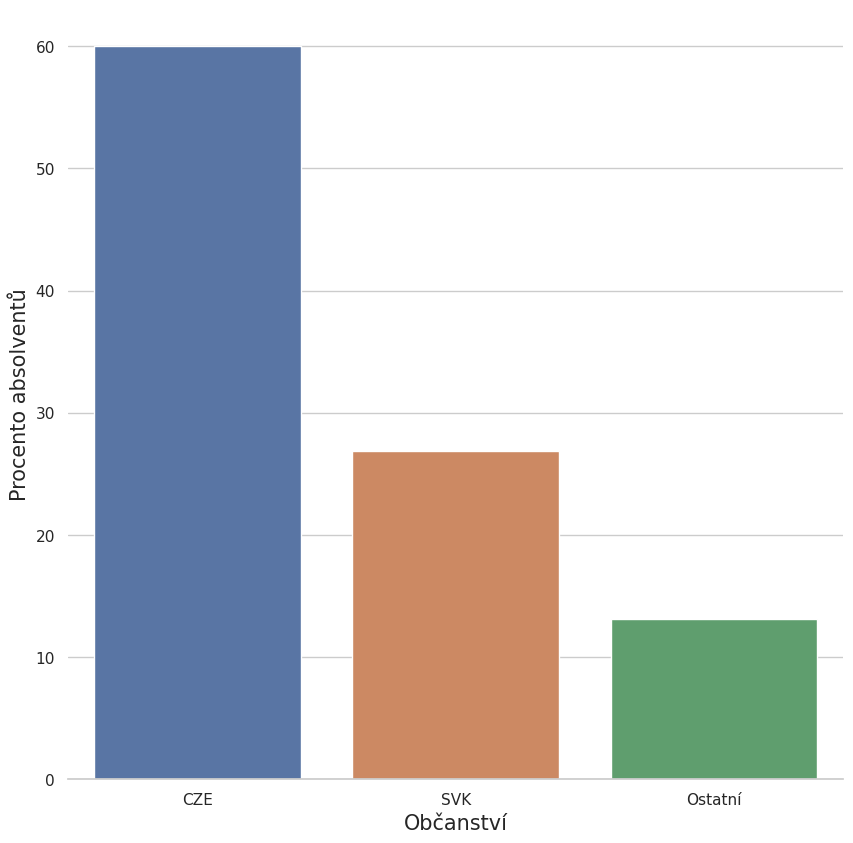

In [88]:
N = 2

title = f'Občanství absolventů'

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")

citizenship = students[students.graduated == True].groupby(['citizenship'])['graduated'].count()
citizenship = citizenship.sort_values(ascending=False)
citizenship['Ostatní'] = citizenship[N:].sum()
citizenship = citizenship.iloc[[*range(N),-1]]

citizenship = 100*citizenship/sum(citizenship)
citizenship = citizenship.reset_index()
display(citizenship)

sns.despine(bottom = True, left = True)
sns.barplot(data=citizenship, x='citizenship', y='graduated');


# plt.title(title, fontweight="bold")
plt.ylabel('Procento absolventů', fontsize=15)
plt.xlabel('Občanství', fontsize=15)

sns.despine(left=True)

save_plot(title)

plt.show()

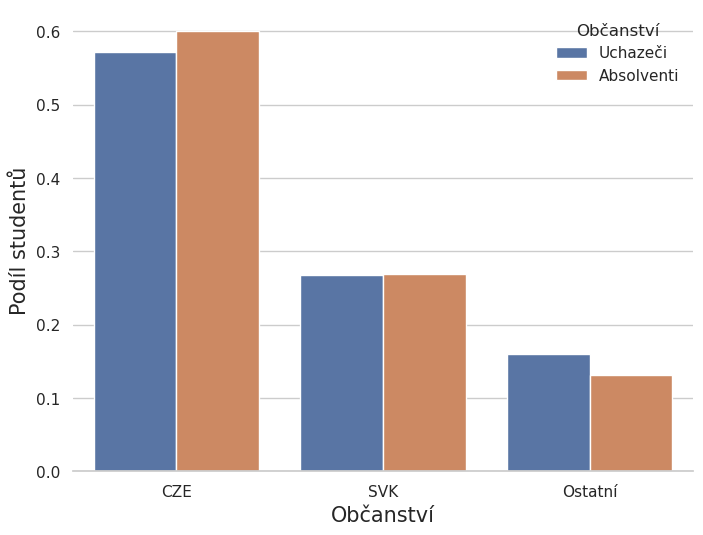

In [101]:
N = 2

title = f'narodnostni_slozeni_studentu'

sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")

citizenship_start = students.groupby(['citizenship'])['degree'].count()
citizenship_start = citizenship_start.sort_values(ascending=False)
citizenship_start['Ostatní'] = citizenship_start[N:].sum()
citizenship_start = citizenship_start.iloc[[*range(N),-1]]

citizenship_start = citizenship_start/sum(citizenship_start)
citizenship_start = citizenship_start.reset_index().rename(columns={'degree': 'ratio'})
citizenship_start['flag'] = 'Uchazeči'

# -------

citizenship_end = students[students.graduated == True].groupby(['citizenship'])['graduated'].count()
citizenship_end = citizenship_end.sort_values(ascending=False)
citizenship_end['Ostatní'] = citizenship_end[N:].sum()
citizenship_end = citizenship_end.iloc[[*range(N),-1]]

citizenship_end = citizenship_end/sum(citizenship_end)
citizenship_end = citizenship_end.reset_index().rename(columns={'graduated': 'ratio'})
citizenship_end['flag'] = 'Absolventi'

citizenship_both = pd.concat([citizenship_start, citizenship_end])


sns.despine(bottom = True, left = True)
sns.barplot(data=citizenship_both, x='citizenship', y='ratio',hue='flag');

# plt.title(title, fontweight="bold")
plt.ylabel('Podíl studentů', fontsize=15)
plt.xlabel('Občanství', fontsize=15)
plt.legend(title='Občanství',frameon=False)

sns.despine(left=True)

save_plot(title)

plt.show()

#### 1.4.1 Citizenship in years

(7283, 21)


<Figure size 640x480 with 0 Axes>

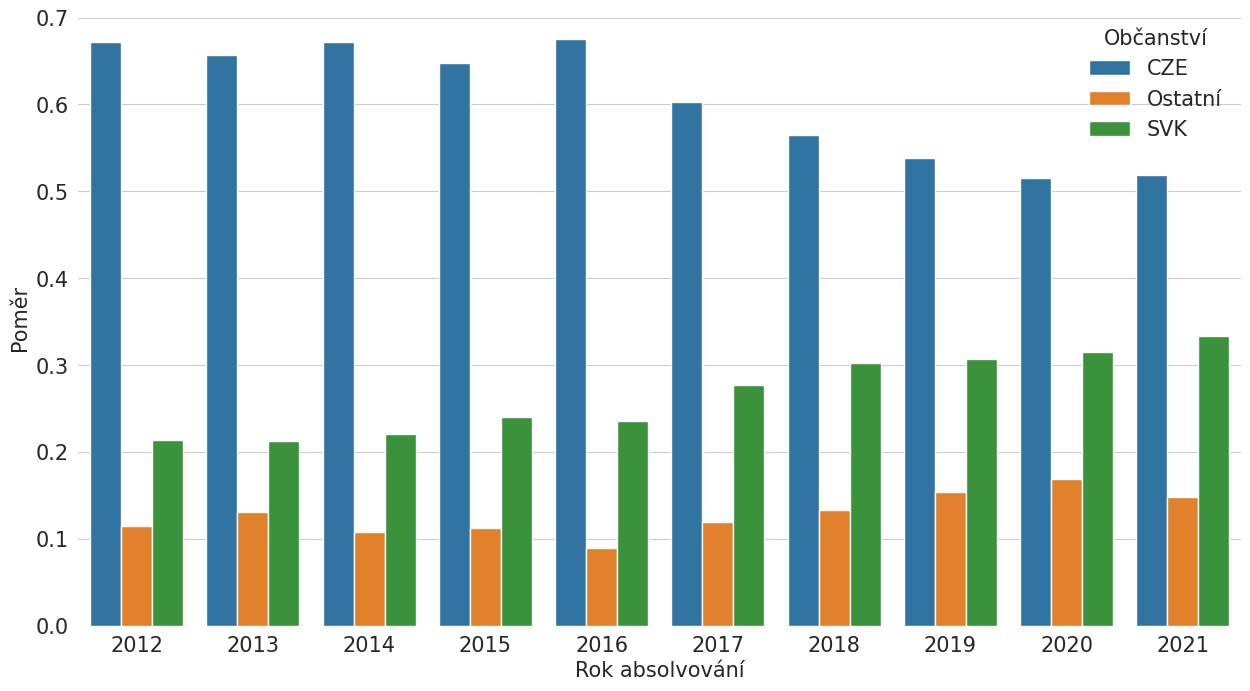

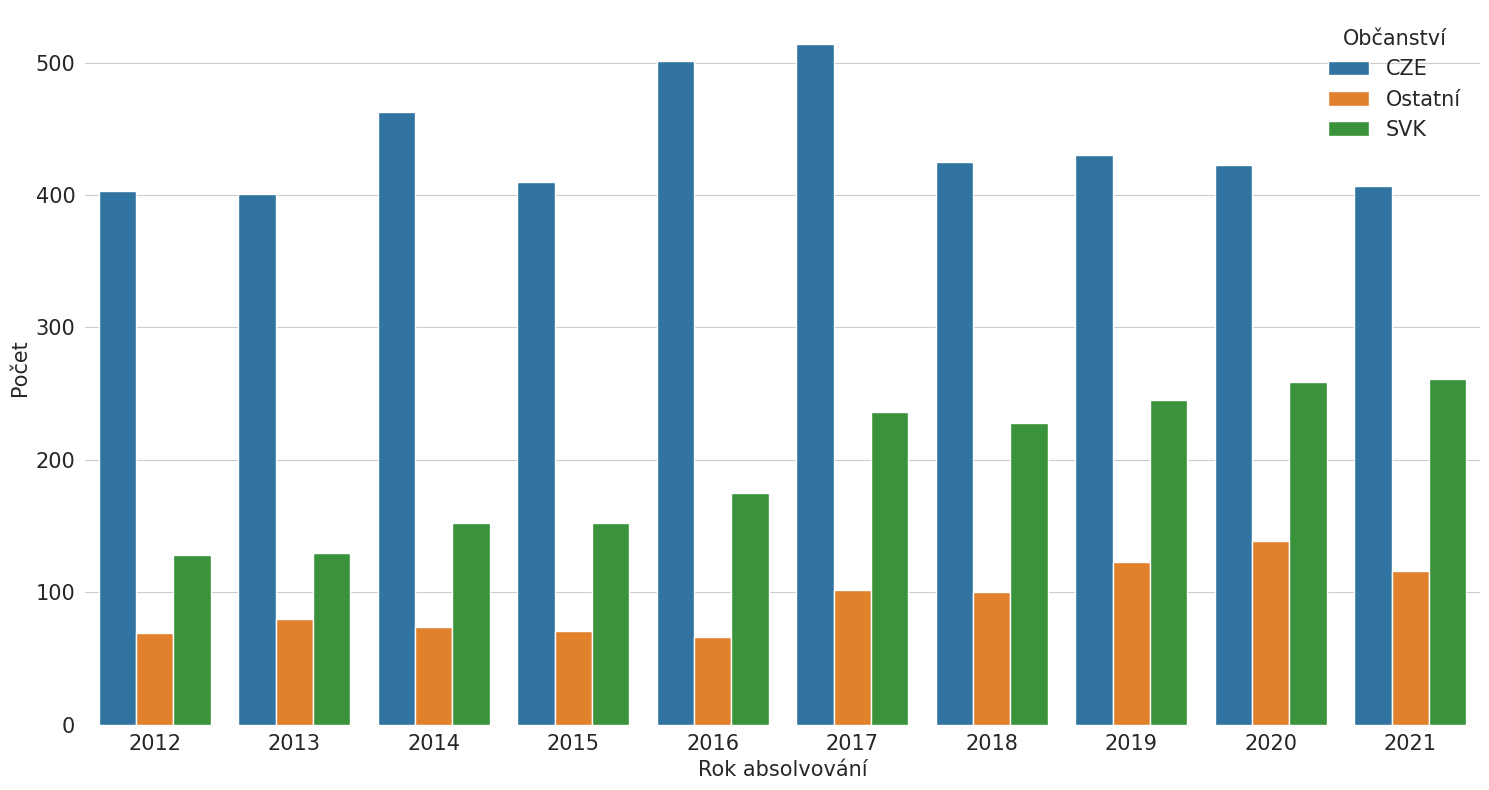

In [7]:
title = f'Občanství absolventů - vývoj'

# sns.set(rc={'figure.figsize':(16,10)})


import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 



sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
citizenship = students[(students.graduated == True)
                       & (~students.citizenship.isna())
                       & (students.date_end < 2022)
                       & (students.date_end > 2011)].rename(columns={'graduated': 'count'})
citizenship.date_end = citizenship.date_end.astype(int)
citizenship.loc[~citizenship.citizenship.isin(['CZE', 'SVK']),'citizenship'] = 'Ostatní'

total_cnt = citizenship.groupby(['date_end'])['count'].count().reset_index()
citizenship = citizenship.groupby(['citizenship', 'date_end'])['count'].count().reset_index()


citizenship = pd.merge(citizenship, total_cnt, on='date_end', suffixes=('', '_total'))
citizenship['ratio'] = citizenship['count'] / citizenship['count_total']

fig = plt.figure(figsize=(15,8))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# ax = fig.add_subplot(2, 1, 1)
sns.barplot(data=citizenship, x="date_end", y="ratio", hue="citizenship")
plt.ylabel('Poměr', fontsize=15)
plt.xlabel('Rok absolvování', fontsize=15)
plt.legend(title='Občanství',frameon=False, fontsize=15, title_fontsize=15)
sns.despine(bottom = True, left = True)

plt.show()

fig = plt.figure(figsize=(15,8))
# ax = fig.add_subplot(2, 1, 2)
sns.barplot(data=citizenship, x="date_end", y="count", hue="citizenship")

plt.xlabel('Rok absolvování', fontsize=15)
plt.ylabel('Počet', fontsize=15)
plt.legend(title='Občanství',frameon=False, fontsize=15, title_fontsize=15)

# fig.suptitle('Občanství absolventů', fontsize=20)
fig.tight_layout()
sns.despine(bottom = True, left = True)

plt.show()

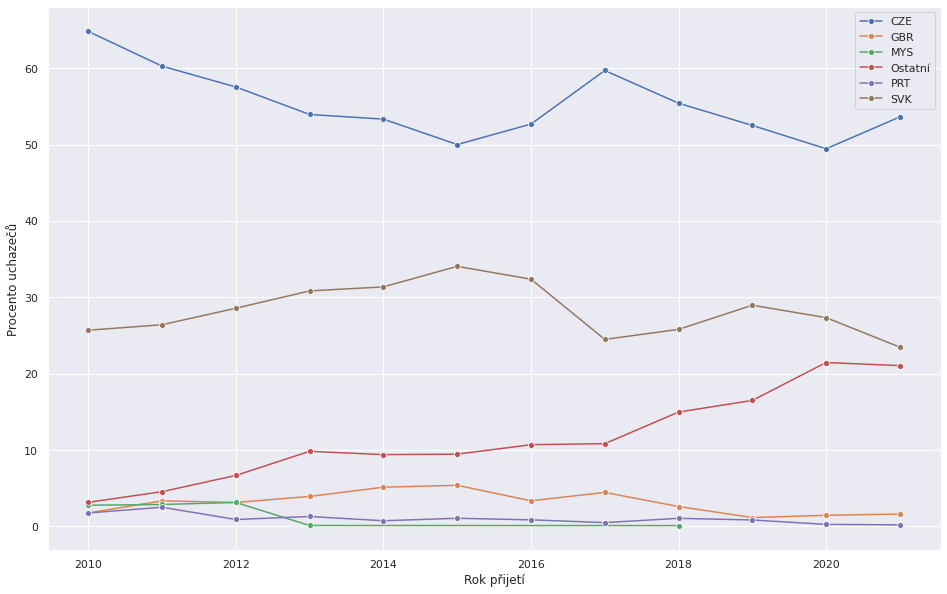

In [9]:
title = f'Vývoj počtu uchazečů'

tmp = students.copy(deep=True)
tmp.loc[(~tmp.citizenship.isin(citizenship.index)) & (~tmp.citizenship.isna()),'citizenship'] = 'Ostatní'
tmp = tmp[(tmp.date_start >= 2010)&(tmp.date_start <= 2021)]
tmp = tmp.groupby(['citizenship','date_start'])['graduated'].count().reset_index()


# students
n_students = tmp.groupby(by='date_start').sum().reset_index()
n_students.columns = ['date_start', 'total']
perc_students = pd.merge(tmp, n_students)
perc_students['perc'] = 100 * perc_students['graduated'] / perc_students['total'] 


for i in tmp.citizenship.unique():
    sns.lineplot(perc_students.date_start, perc_students[perc_students.citizenship == i].perc, label=i, marker="o")
    
    
plt.ylabel('Procento uchazečů')
plt.xlabel('Rok přijetí')
save_plot(title)

plt.show()

### 1.5 Language

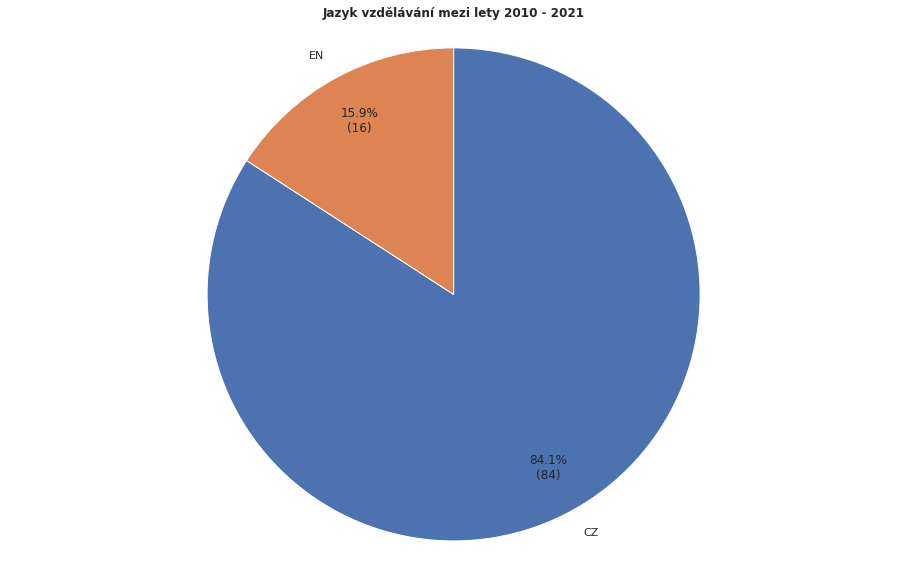

In [10]:
language = students[year_filter].groupby('language')['graduated'].count()

def fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, citizenship.sum()*x/100)

plt.pie(language.values,
        labels=language.index,
        startangle=90,
        autopct=fmt,
        pctdistance=0.8,
        counterclock=False)

# plt.legend()
plt.axis('equal')
plt.title(f'Jazyk vzdělávání mezi lety {year_first} - {year_last}', fontweight="bold")
plt.show()

### 1.6 Age

In [4]:
print(f'Avg age end: {np.nanmean(students[students.graduated == True].age_end)}')
print(f'Avg age end: {np.nanmean(students.age_start)}')

Avg age end: 26.856416645900822
Avg age end: 20.796480855855854


Všeobecné lékařství


,age_end
count,16586.000000
mean,27.040516
std,2.763459
min,18.000000
25%,25.000000
50%,26.000000
75%,29.000000
max,67.000000


Zubní lékařství


,age_end
count,3306.000000
mean,25.955233
std,2.940837
min,19.000000
25%,24.000000
50%,25.000000
75%,27.000000
max,55.000000


Vojenské všeobecné lékařství


,age_end
count,168.000000
mean,26.452381
std,1.451035
min,25.000000
25%,26.000000
50%,26.000000
75%,27.000000
max,33.000000


Vojenské zubní lékařství


,age_end
count,5.000000
mean,25.600000
std,1.140175
min,24.000000
25%,25.000000
50%,26.000000
75%,26.000000
max,27.000000


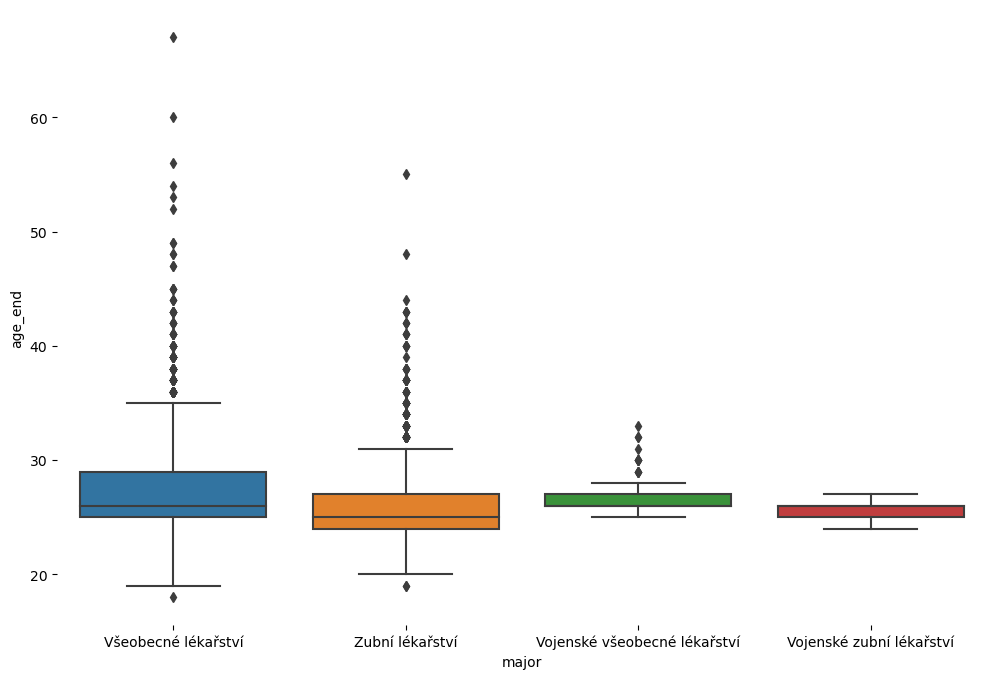

In [4]:
dr = students[students['graduated'] == True][['graduated', 'major', 'age_end']]

for major in dr.major.unique():
    print(major)
    display(dr[dr.major == major].describe())
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="major", y="age_end", data=dr)
sns.despine(bottom = True, left = True)
plt.show()


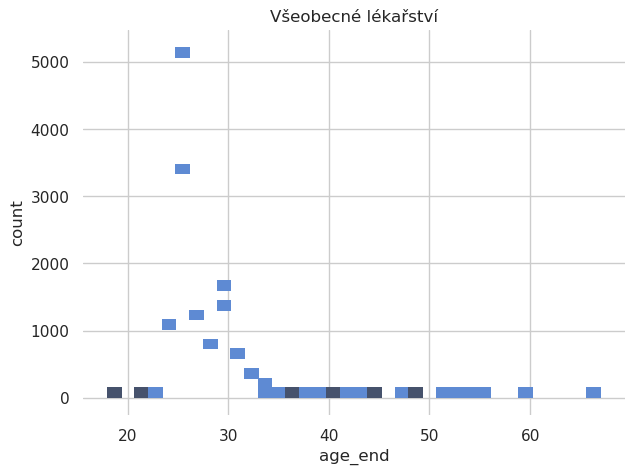

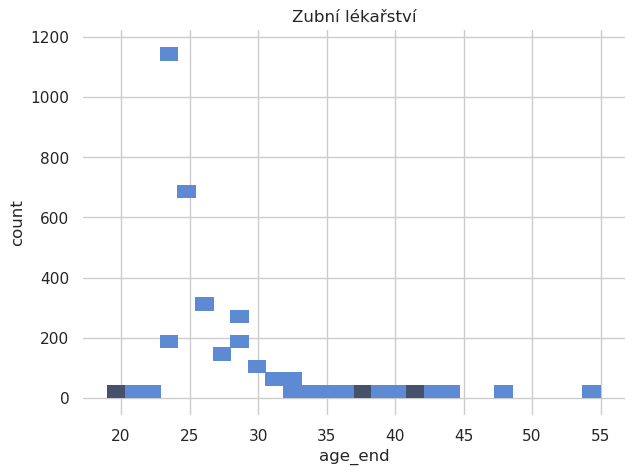

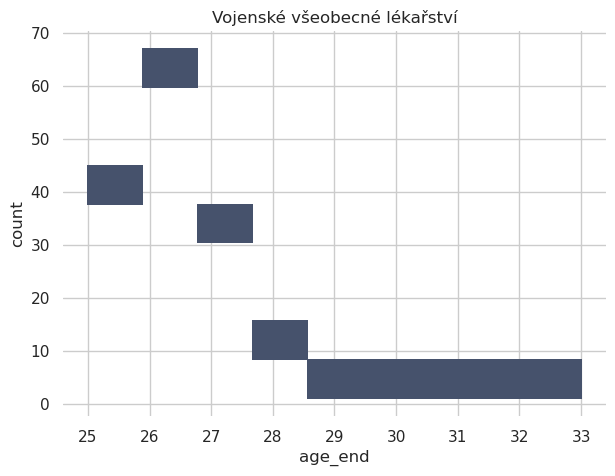

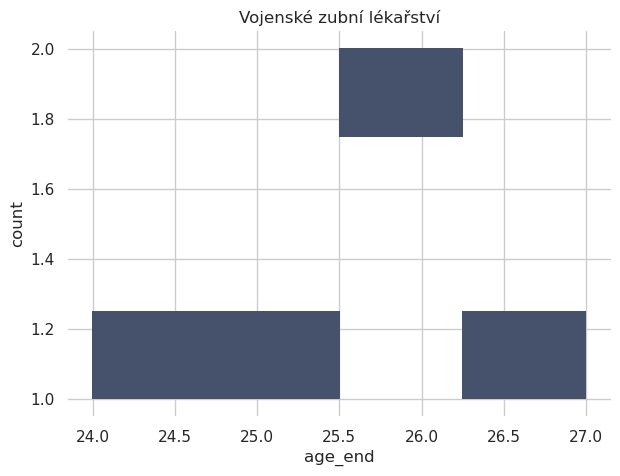

In [178]:
dr = students[students['graduated'] == True][['major', 'age_end']]

for major in dr.major.unique():
    plt.figure(figsize=(7,5))
    dr_cnt = dr[dr.major == major].groupby('age_end').count().reset_index()
    # display(dr_cnt)
    sns.histplot(x=dr_cnt.age_end, y=dr_cnt.major, bins=dr_cnt.shape[0])
    plt.title(major)
    plt.ylabel('count')
    plt.xlabel('age_end')
    sns.despine(bottom = True, left = True)
    plt.show()


### 1.7 Study length

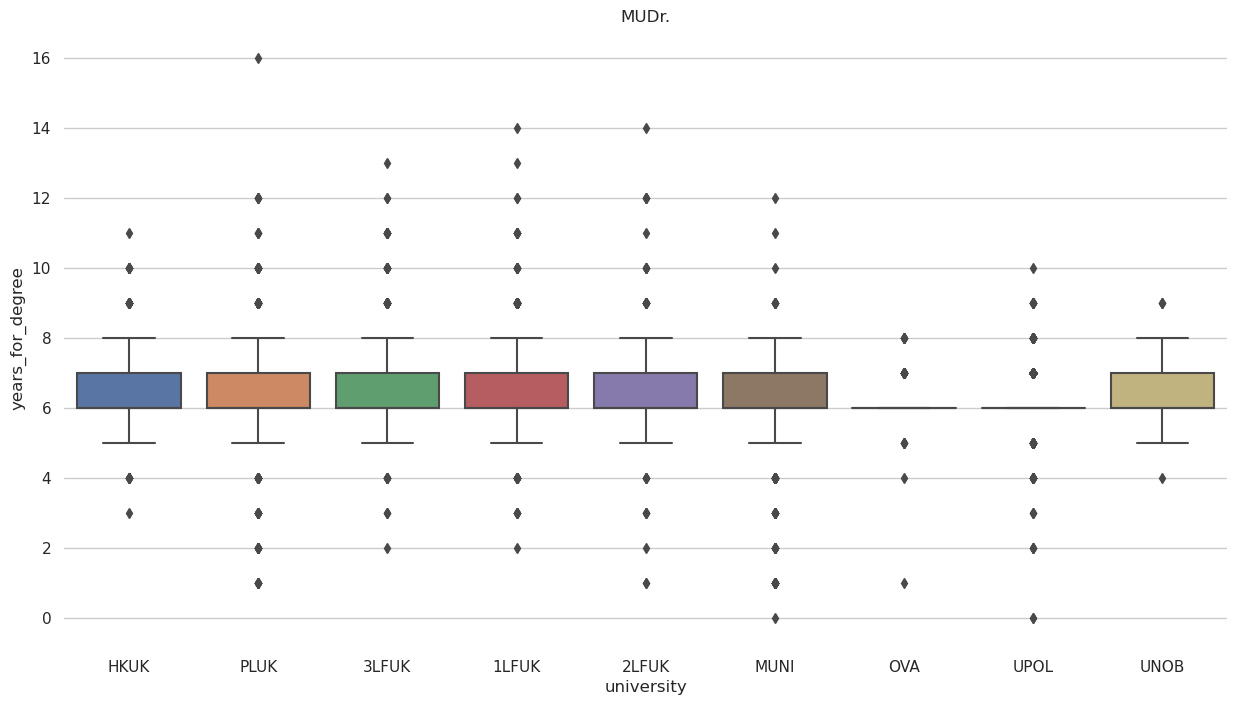

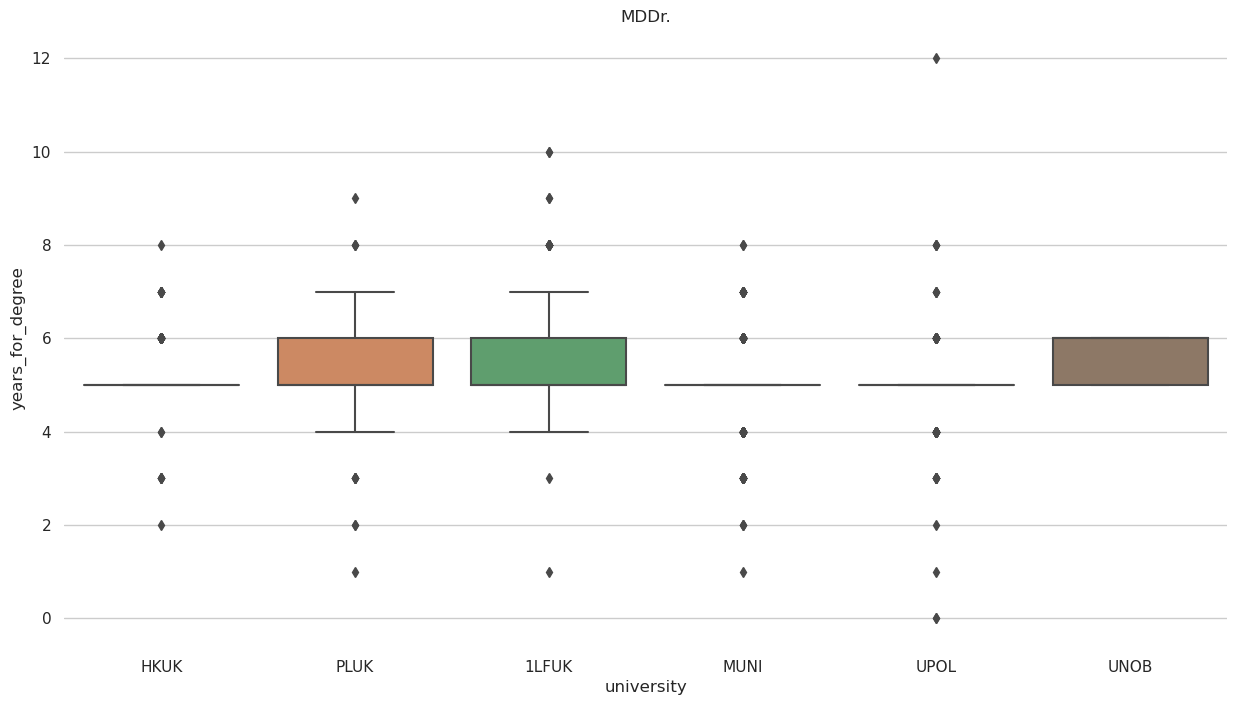

In [170]:
for degree in students['degree'].unique():
    dr = students[students['degree'] == degree]

    ax = sns.boxplot(x="university", y="years_for_degree", data=dr)
    plt.title(degree)
    sns.despine(bottom = True, left = True)
    plt.show()

In [28]:
x = study_length_info(students)

print(x.to_latex())

Průměrná délka studia k získání titulu MUDR.: 6.33 let (počet ročníků studia: 6.0)
Podle fakult:
   - HKUK: 6.36 let (prodlužovalo: 27.86 %)
   - PLUK: 6.4 let (prodlužovalo: 33.8 %)
   - 3LFUK: 6.41 let (prodlužovalo: 29.45 %)
   - 1LFUK: 6.45 let (prodlužovalo: 37.3 %)
   - 2LFUK: 6.4 let (prodlužovalo: 34.91 %)
   - MUNI: 6.17 let (prodlužovalo: 25.6 %)
   - OVA: 6.06 let (prodlužovalo: 6.96 %)
   - UPOL: 6.14 let (prodlužovalo: 16.09 %)
   - UNOB: 6.39 let (prodlužovalo: 34.52 %)
--------------------------------------------------------------------------------
Průměrná délka studia k získání titulu MUDR.: 5.12 let (počet ročníků studia: 5.0)
Podle fakult:
   - HKUK: 5.16 let (prodlužovalo: 16.55 %)
   - PLUK: 5.25 let (prodlužovalo: 27.85 %)
   - 1LFUK: 5.3 let (prodlužovalo: 25.87 %)
   - MUNI: 4.97 let (prodlužovalo: 16.3 %)
   - UPOL: 4.99 let (prodlužovalo: 5.25 %)
   - UNOB: 5.6 let (prodlužovalo: 60.0 %)
-------------------------------------------------------------------------

### 1.8 Average age during graduation

In [169]:
# graduated = students[(students.graduated == True) & (students.date_end < 2022)][['date_end', 'age_end']]
# graduated_med = graduated.groupby(['date_end']).median()
# graduated_mean = graduated.groupby(['date_end']).mean()#.reset_index()

# display(graduated.groupby(['date_end']).agg(pd.Series.mode))
# display(graduated_med)
# display(graduated_mean)

# sns.set_style('whitegrid')
# plt.grid(True, axis='y')
# ax = sns.lineplot(graduated_mean, marker="o")

# plt.ylim(20,30)
# sns.despine(bottom = True, left = True)

# ax.yaxis.grid(True) # Hide the horizontal gridlines
# ax.xaxis.grid(False) # Show the vertical gridlines
    
# # plt.ylabel('Procento uchazečů')
# # plt.xlabel('Rok přijetí')
# # save_plot(title)

# plt.show()

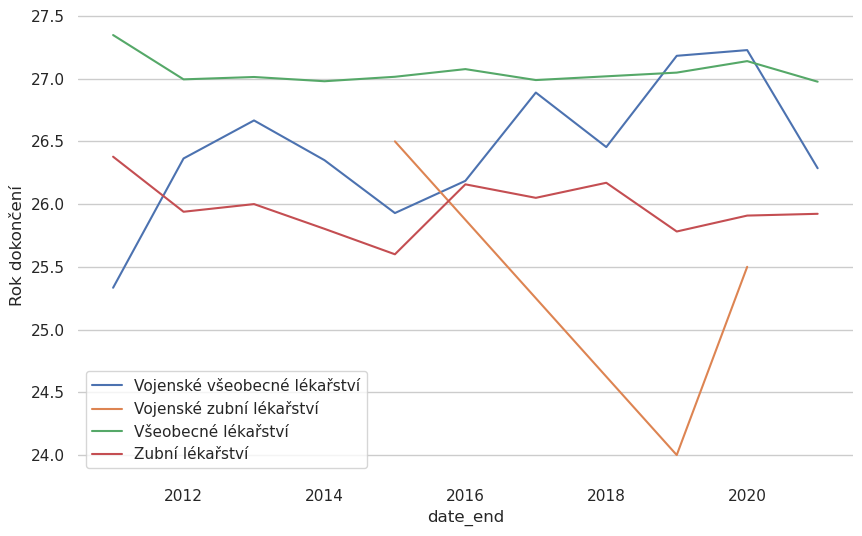

In [168]:
fig, ax = plt.subplots(figsize=(10,6))


x = students[(students.graduated==True)
                & (students.date_end < 2022)].groupby(['major', 'date_end']).mean()['age_end'].reset_index()



sns.set_style('whitegrid')

for major in x.major.unique():
    y = x[x.major == major]
    ax = y.plot(ax=ax, x='date_end', y='age_end',label=major)

sns.despine(bottom = True, left = True)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.legend()
plt.ylabel('Průměrný věk absolventa')
plt.ylabel('Rok dokončení')
plt.show()

## 2. IC

In [120]:
insurances = pd.read_csv(PATH_FINAL+'insurances.csv', index_col=0)
ozp = insurances[insurances.insurance_company == 'OZP']
vzp = insurances[insurances.insurance_company == 'VZP']

### 2.1 Dentists - visits

<Figure size 640x480 with 0 Axes>

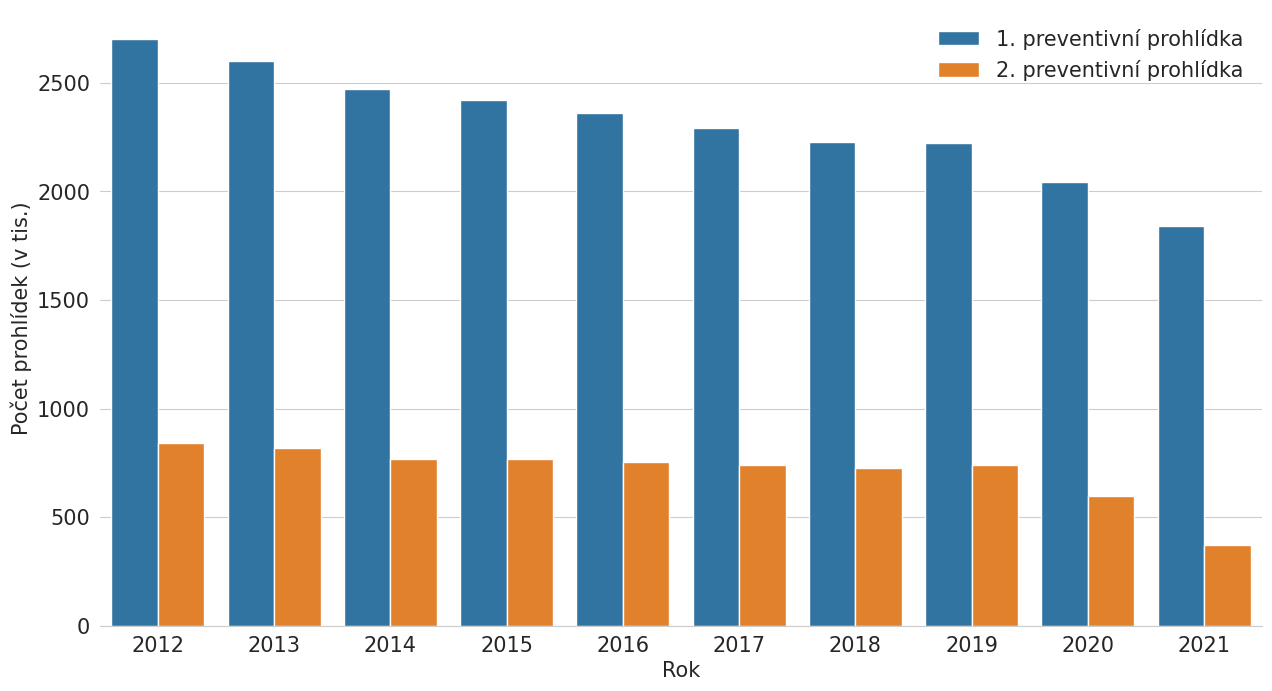

In [127]:
# Preventivka kod 00901 odb 014 
prohlidka1 = vzp[(vzp.year > 2011) & vzp['procedure_code'].isin([901])].groupby('year')[['count']].sum().reset_index()
prohlidka1['prohlidka'] = '1. preventivní prohlídka'
prohlidka2 = vzp[(vzp.year > 2011) & vzp['procedure_code'].isin([902])].groupby('year')[['count']].sum().reset_index()
prohlidka2['prohlidka'] = '2. preventivní prohlídka'

prohlidky = pd.concat([prohlidka1, prohlidka2])
prohlidky['count'] = prohlidky['count'] / 1000

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

fig = plt.figure(figsize=(15,8))

sns.barplot(data=prohlidky, x="year", y="count", hue="prohlidka")
plt.ylabel('Počet prohlídek (v tis.)', fontsize=15)
plt.xlabel('Rok', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(frameon=False, fontsize=15)
sns.despine(left = True)

plt.show();

# pocet pojistencu vzp 5914857
# https://www.idnes.cz/zpravy/domaci/zubni-prevence-preventivni-prohlidky-minimum-lidi.A180926_222147_domaci_kuce

In [131]:
print(f'Procento prohlidek v roce 2021: {1840488/5914857}')
print(f'Procento 2. prohlidek v roce 2021: {370019/5914857}')


Procento prohlidek v roce 2021: 0.3111635665917198
Procento prohlidek v roce 2021: 0.06255755633652682


## 3. Doctors

In [5]:
students = pd.read_csv(PATH_FINAL+'students.csv', index_col=0)
doctors = pd.read_csv(PATH_FINAL+'doctors_all.csv', index_col=0)

### 3.1 New doctors / Graduate students ratio

D/S ratio mean: 0.7724026578898342


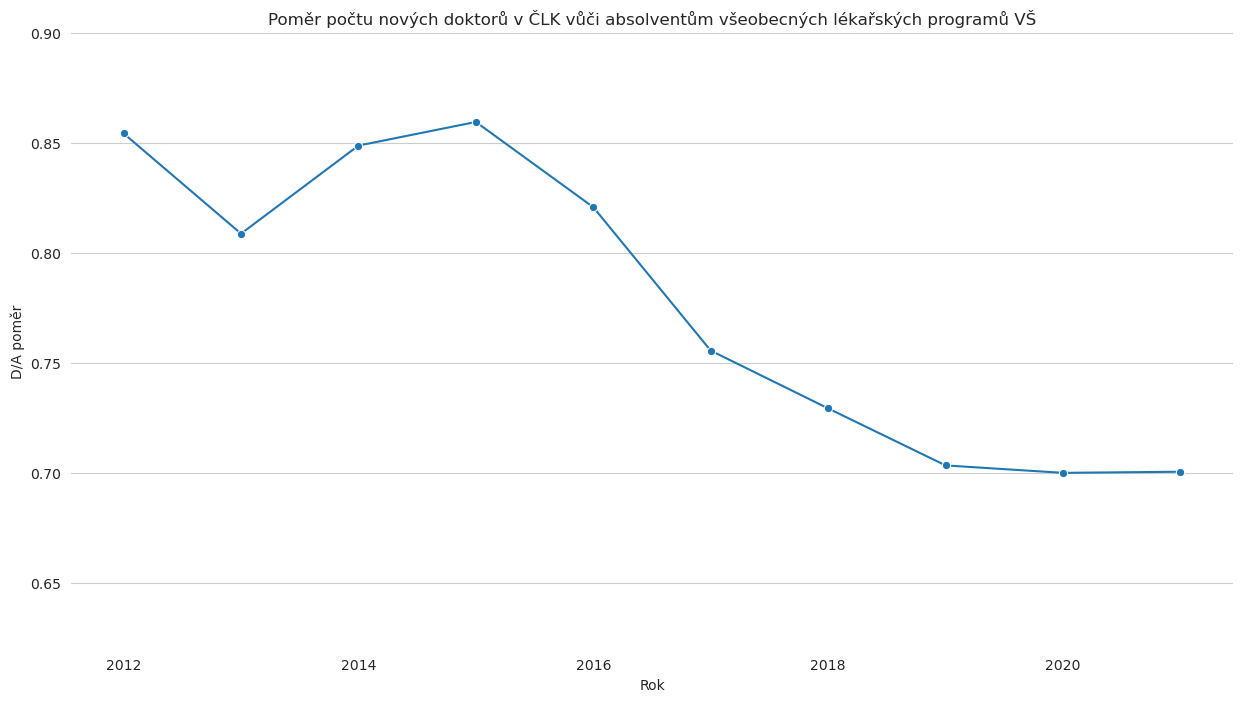

,year,new_docs,graduated,D/S_ratio
2,2012.0,1295,1516,0.854222
9,2013.0,1065,1317,0.808656
8,2014.0,1178,1388,0.848703
6,2015.0,1229,1430,0.859441
1,2016.0,1341,1634,0.820685
0,2017.0,1375,1820,0.755495
5,2018.0,1247,1710,0.729240
7,2019.0,1209,1719,0.703316
4,2020.0,1248,1783,0.699944
3,2021.0,1251,1786,0.700448


In [6]:
title = 'Poměr počtu nových doktorů v ČLK vůči absolventům všeobecných lékařských programů VŠ'
dr = students[(students['graduated'] == True)\
                & (students.major == 'Všeobecné lékařství')\
                & (students.date_end < 2022)\
                & (students.date_end > 2011)][['graduated', 'date_end']]
                
finished_students = dr.groupby('date_end').count().reset_index()
finished_students.columns = ['year', 'graduated']
new_docs = doctors[doctors.graduated_year < 2022].graduated_year.value_counts().reset_index()
new_docs.columns = ['year', 'new_docs']
docs_students = pd.merge(new_docs, finished_students)
docs_students['D/S_ratio'] = docs_students['new_docs']/docs_students['graduated']


sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plt.grid(True, axis='y')
ax = sns.lineplot(y=docs_students['D/S_ratio'], x=docs_students['year'], marker="o", linewidth = 1.5)
sns.despine(bottom = True, left = True)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

plt.title(title)
plt.xlabel('Rok')
plt.ylabel('D/A poměr')
plt.ylim(.62, .9)

print(f"D/S ratio mean: {docs_students['new_docs'].sum()/docs_students['graduated'].sum()}")
plt.show();
docs_students.sort_values('year')

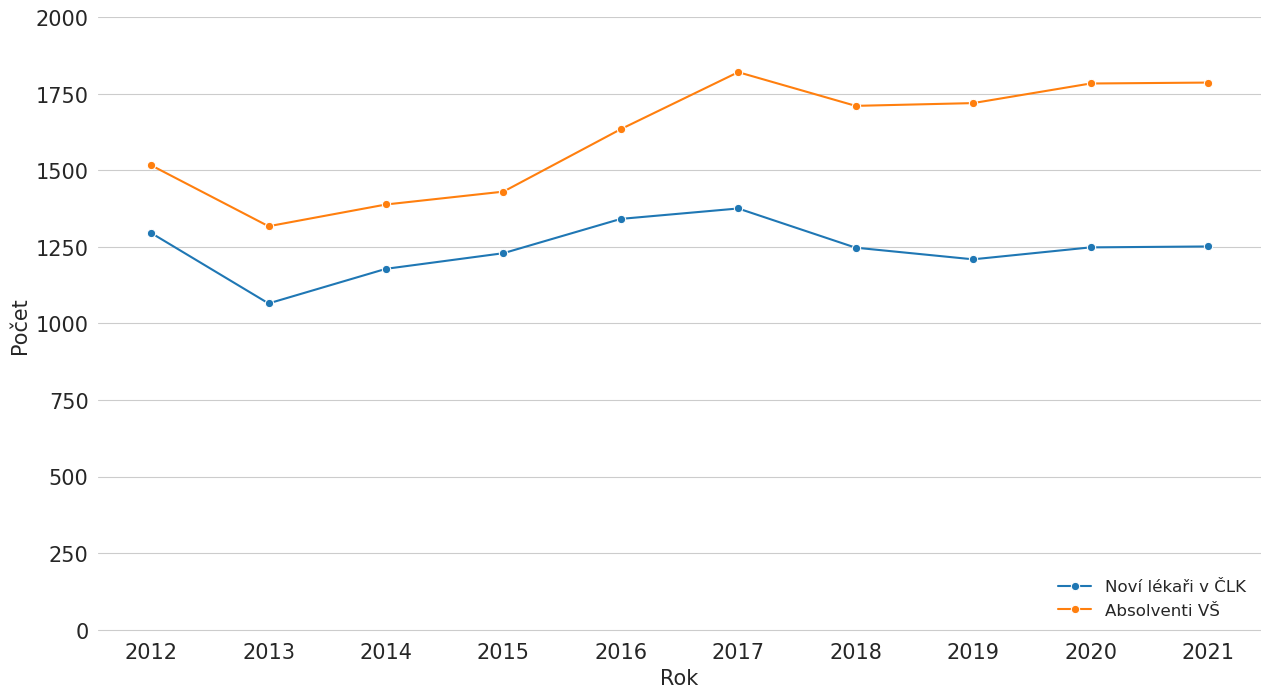

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(15, 8))
plt.grid(True, axis='y')

ax = sns.lineplot(y=new_docs[new_docs.year > 2011]['new_docs'], x=new_docs[new_docs.year > 2011]['year'], marker="o", linewidth = 1.5, label='Noví lékaři v ČLK')
ax = sns.lineplot(y=finished_students['graduated'], x=finished_students['year'], marker="o", linewidth = 1.5, label='Absolventi VŠ')

sns.despine(bottom = True, left = True)

plt.xticks(range(2012,2022))

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(False) # Show the vertical gridlines

# plt.title('Všeobecné lékařsví a ČLK')
plt.xlabel('Rok', fontsize=15)
plt.ylabel('Počet', fontsize=15)
# plt.xlim(2011, 2022)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-10, 2001)
# plt.legend()
plt.legend(frameon=False, fontsize=12, loc='lower right')

plt.show();

In [63]:
print(f'Počet nových doktorů mezi lety 2012-2016: {docs_students[(docs_students.year < 2017)].new_docs.sum()}')
print(f'Poměr D/A lety 2012-2016: {docs_students[(docs_students.year < 2017)].new_docs.sum()/docs_students[(docs_students.year < 2017)].graduated.sum()}')
print(f'Počet nových doktorů mezi lety 2017-2021: {docs_students[(docs_students.year >= 2017)].new_docs.sum()}')
print(f'Poměr D/A lety 2017-2021: {docs_students[(docs_students.year >= 2017)].new_docs.sum()/docs_students[(docs_students.year >= 2017)].graduated.sum()}')

Počet nových doktorů mezi lety 2012-2016: 6108
Poměr D/A lety 2012-2016: 0.8384351407000686
Počet nových doktorů mezi lety 2017-2021: 6330
Poměr D/A lety 2017-2021: 0.7178498525742799


### 3.2 Medical specialty based on the age

In [52]:
import ast

doctors = pd.read_csv(PATH_FINAL+'doctors_all.csv', index_col=0)
doctors_no_na = doctors[(~doctors.graduated_year.isna())
                        & (~doctors.workplace_name.isna())
                        & (~doctors.medical_specialty.isna())
                        & (doctors.medical_specialty != '[]')
                        & (doctors.n_workplaces > 0)
                        & (doctors.age_estimate <= 80)][['age_estimate', 'medical_specialty']]
doctors_no_na.medical_specialty = doctors_no_na.medical_specialty.apply(ast.literal_eval)
doctors_no_na = doctors_no_na.explode('medical_specialty').reset_index().drop_duplicates(['_id', 'medical_specialty'])

In [68]:
N = doctors_no_na.medical_specialty.nunique()     # Number of boxes

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(120, 0, N)]


# Sort medical specialties by age
med_specialties = doctors_no_na.groupby('medical_specialty')['age_estimate'].mean()
med_specialties_sorted = med_specialties.sort_values().index

# Compute age mean
mean_age = doctors_no_na.age_estimate.mean()
optimal_mean_age = (65 + students[students.graduated == True].age_end.mean())/2

# Each box is represented by a dict that contains the data, the type, and the colour.
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
fig = go.Figure(data=[go.Box(
    y=doctors_no_na[doctors_no_na.medical_specialty == ms].age_estimate.to_list(),
    marker_color=c[i],
    name=f'{ms} ({len(doctors_no_na[doctors_no_na.medical_specialty == ms])}) '
    ) for i, ms in enumerate(med_specialties_sorted)])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(zeroline=False, gridcolor='lightgray'),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(255,255,255)',
    autosize=False,
    width=2000,
    height=800,
    showlegend=False,
)
fig.update_xaxes(tickangle=-90)


# Real age mean
fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [mean_age, mean_age], mode='lines', xaxis='x2',
                            showlegend=False, line=dict(dash='dash', color = "firebrick", width = 2))
fig.add_annotation(x=N+1, y=mean_age,
            text="Průměrný věk",
            showarrow=False,
            yshift=10)

# Optimal age mean
fig.layout.xaxis3 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [optimal_mean_age, optimal_mean_age], mode='lines', xaxis='x3',
                            showlegend=False, line=dict(dash='dash', color = "green", width = 2))
fig.add_annotation(x=N+1, y=optimal_mean_age,
            text="Ideální průměrný věk",
            showarrow=False,
            yshift=10)

fig.layout.xaxis4 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [65, 65], mode='lines', xaxis='x4',
                            showlegend=False, line=dict(dash='dash', color = "gray", width = 2))
fig.add_annotation(x=N+1, y=65,
            text="Důchodový věk",
            showarrow=False,
            yshift=10)

fig.show()

fig.write_html(IMAGE_PATH+"medical_specialty.html")

In [69]:
# only min_cnt+ doctors
doctors_more_vc = doctors_no_na.medical_specialty.value_counts()

min_cnt = 50

doctors_more = doctors_no_na[doctors_no_na.medical_specialty.isin(doctors_more_vc[doctors_more_vc > min_cnt].index)].reset_index().drop_duplicates(['_id', 'medical_specialty'])

N = doctors_more.medical_specialty.nunique()     # Number of boxes

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(120, 0, N)]

# Sort medical specialties by age
med_specialties = doctors_more.groupby('medical_specialty')['age_estimate'].mean()
med_specialties_sorted = med_specialties.sort_values().index

# Compute age mean
mean_age = doctors_no_na.age_estimate.mean()
optimal_mean_age = (65 + students[students.graduated == True].age_end.mean())/2

# Each box is represented by a dict that contains the data, the type, and the colour.
fig = go.Figure(data=[go.Box(
    y=doctors_more[doctors_more.medical_specialty == ms].age_estimate.to_list(),
    marker_color=c[i],
    name=f'{ms} ({len(doctors_more[doctors_more.medical_specialty == ms])}) '
    ) for i, ms in enumerate(med_specialties_sorted)])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False,),
    yaxis=dict(zeroline=False, gridcolor='lightgray', title='Věk'),
    font=dict(size=15,),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(255,255,255)',
    autosize=False,
    width=1650,
    height=1000,
    showlegend=False,
)
fig.update_xaxes(tickangle=-90)
fig.update_yaxes(tickangle=-90)  


# Real age mean
fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x=[0,2], y=[mean_age, mean_age], mode='lines', xaxis='x2',
                            showlegend=False, line=dict(dash='dash', color = "firebrick", width = 2))
fig.add_annotation(x=N+2, y=mean_age-7,
            text="Průměrný věk",
            showarrow=False,
            textangle=-90,
            yshift=10)

# # Optimal age mean
# fig.layout.xaxis3 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
# fig.add_scatter(x = [0, 2], y = [optimal_mean_age, optimal_mean_age], mode='lines', xaxis='x3',
#                             showlegend=False, line=dict(dash='dash', color = "green", width = 2))
# fig.add_annotation(x=N+1, y=optimal_mean_age,
#             text="Ideální průměrný věk",
#             showarrow=False,
#             yshift=10)

fig.layout.xaxis4 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [65, 65], mode='lines', xaxis='x4',
                            showlegend=False, line=dict(dash='dash', color = "gray", width = 2))
fig.add_annotation(x=N+2, y=71,
            text="Důchodový věk",
            showarrow=False,
            textangle=-90,
            yshift=10)

fig.show()

fig.write_html(IMAGE_PATH+f"medical_specialty_{min_cnt}.html")



In [55]:
# only min_cnt+ doctors
doctors_more_vc = doctors_no_na.medical_specialty.value_counts()

min_cnt = 50

doctors_more = doctors_no_na[doctors_no_na.medical_specialty.isin(doctors_more_vc[doctors_more_vc <= min_cnt].index)].reset_index().drop_duplicates(['_id', 'medical_specialty'])

N = doctors_more.medical_specialty.nunique()     # Number of boxes

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(120, 0, N)]

# Sort medical specialties by age
med_specialties = doctors_more.groupby('medical_specialty')['age_estimate'].mean()
med_specialties_sorted = med_specialties.sort_values().index

# Compute age mean
mean_age = doctors_no_na.age_estimate.mean()
optimal_mean_age = (65 + students[students.graduated == True].age_end.mean())/2

# Each box is represented by a dict that contains the data, the type, and the colour.
fig = go.Figure(data=[go.Box(
    y=doctors_more[doctors_more.medical_specialty == ms].age_estimate.to_list(),
    marker_color=c[i],
    name=f'{ms} ({len(doctors_more[doctors_more.medical_specialty == ms])}) '
    ) for i, ms in enumerate(med_specialties_sorted)])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False,),
    yaxis=dict(zeroline=False, gridcolor='lightgray', title='Věk'),
    yaxis_range=[29,81],
    font=dict(size=15,),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(255,255,255)',
    autosize=False,
    width=1450,
    height=1000,
    showlegend=False,
)
fig.update_xaxes(tickangle=-90)
fig.update_yaxes(tickangle=-90)  


# Real age mean
fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x=[0,2], y=[mean_age, mean_age], mode='lines', xaxis='x2',
                            showlegend=False, line=dict(dash='dash', color = "firebrick", width = 2))
fig.add_annotation(x=N+2, y=mean_age-7,
            text="Průměrný věk",
            showarrow=False,
            textangle=-90,
            yshift=10)

fig.layout.xaxis4 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
fig.add_scatter(x = [0, 2], y = [65, 65], mode='lines', xaxis='x4',
                            showlegend=False, line=dict(dash='dash', color = "gray", width = 2))
fig.add_annotation(x=N+2, y=71,
            text="Důchodový věk",
            showarrow=False,
            textangle=-90,
            yshift=10)

fig.show()

fig.write_html(IMAGE_PATH+f"medical_specialty_under_{min_cnt}.html")



In [83]:
top_spec = doctors_no_na[doctors_no_na.medical_specialty.isin(doctors_more_vc[doctors_more_vc > 1600].index)].medical_specialty.unique()
print('Top med spec - avg age:')
top_med_spec = pd.DataFrame(med_specialties).reset_index()
display(top_med_spec[top_med_spec.medical_specialty.isin(top_spec)])
print('Top med spec - count:')
top_doc = doctors_no_na[doctors_no_na.medical_specialty.isin(top_spec)]
display(top_doc.groupby('medical_specialty').count())

print(f'60+/total: {top_doc[top_doc.age_estimate >= 60].shape[0]}/{top_doc.shape[0]} ({round(100 * top_doc[top_doc.age_estimate >= 60].shape[0]/top_doc.shape[0],2)}%)')

Top med spec - avg age:


,medical_specialty,age_estimate
3,chirurgie,59.826331
15,gynekologie a porodnictví,57.751786
40,pediatrie,60.885975
53,vnitřní lékařství,59.947846
54,všeobecné praktické lékařství,59.066371


Top med spec - count:


,_id,age_estimate
medical_specialty,,
chirurgie,1785,1785
gynekologie a porodnictví,1680,1680
pediatrie,2517,2517
vnitřní lékařství,3528,3528
všeobecné praktické lékařství,4053,4053


60+/total: 7473/13563 (55.1%)


In [117]:
tmp = doctors[doctors.doctor_url.str.contains('lkcr.cz')].reset_index().drop_duplicates('_id')
tmp[~tmp.workplace_name.isna()].shape

# doctors[(doctors.n_workplaces > 0) & (~doctors.workplace_name.isna())].reset_index().drop_duplicates('_id').shape

(45755, 26)

### 3.3 New/Old doctors

In [35]:
not_graduated = students[(students.graduated == False)
                         & (students.date_end >= 2022)
                         & (students.dropout == False)
                         & (students.major == 'Všeobecné lékařství')].reset_index()[['date_end', 'index']]
graduation_estimate = not_graduated.groupby('date_end').count().reset_index()
graduation_estimate.column = ['year', 'count']
graduation_estimate

,date_end,index
0,2022.0,268
1,2023.0,292
2,2024.0,303
3,2025.0,319
4,2026.0,253
5,2027.0,536
